# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [7]:
from ainvert import A_invert

print(A_invert)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [-3  3  0  0 -2 -1  0  0  0  0  0  0  0  0  0  0]
 [ 2 -2  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 -3  3  0  0 -2 -1  0  0]
 [ 0  0  0  0  0  0  0  0  2 -2  0  0  1  1  0  0]
 [-3  0  3  0  0  0  0  0 -2  0 -1  0  0  0  0  0]
 [ 0  0  0  0 -3  0  3  0  0  0  0  0 -2  0 -1  0]
 [ 9 -9 -9  9  6  3 -6 -3  6 -6  3 -3  4  2  2  1]
 [-6  6  6 -6 -3 -3  3  3 -4  4 -2  2 -2 -2 -1 -1]
 [ 2  0 -2  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0 -2  0  0  0  0  0  1  0  1  0]
 [-6  6  6 -6 -4 -2  4  2 -3  3 -3  3 -2 -1 -2 -1]
 [ 4 -4 -4  4  2  2 -2 -2  2 -2  2 -2  1  1  1  1]]


In [8]:
def load_image(image_name):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image


def show_image_real_size(image, dpi, title=""):
    height, width = image.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.gray()
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

In [55]:
def cubic_interpolation(image_name, scale_x, scale_y):
    image = load_image(image_name)
    image = np.array(image, dtype='float')
    m, n = image.shape
    new_m, new_n = int(m*scale_y), int(n*scale_x)
    scaled_image = np.zeros((new_m, new_n))

    def compute_derivatives(x1, y1, k):
        x2, y2 = max(0, x1 - 1), max(0, y1 - 1)
        x3, y3 = min(m - 1, x1 + 1), min(n - 1, y1 + 1)
        vector[k] = image[x1, y1]
        vector[k + 4] = (image[x3, y1] - image[x2, y1]) / 2
        vector[k + 8] = (image[x1, y3] - image[x1, y2]) / 2
        vector[k + 12] = (image[x3, y3] - image[x3, y2] - image[x2, y3] + image[x2, y2]) / 4

    for i in range(new_m):
        for j in range(new_n):
            i1 = int(i / scale_y)
            j1 = int(j / scale_x)
            i2 = min(i1 + 1, m - 1)
            j2 =  min(j1 + 1, n - 1)
            vector = np.zeros(16)
            compute_derivatives(i1, j1, 0)
            compute_derivatives(i1, j2, 1)
            compute_derivatives(i2, j1, 2)
            compute_derivatives(i2, j2, 3)
            coefficients = A_invert @ vector
            coefficients = np.split(coefficients, 4)
            x = (i / scale_y) - i1
            y = (j / scale_x) - j1
            scaled_image[i, j] = np.array([1, x, x**2, x**3]) @ coefficients @ np.array([1, y, y**2, y**3]).T

    show_image_real_size(scaled_image, 40)
    return scaled_image

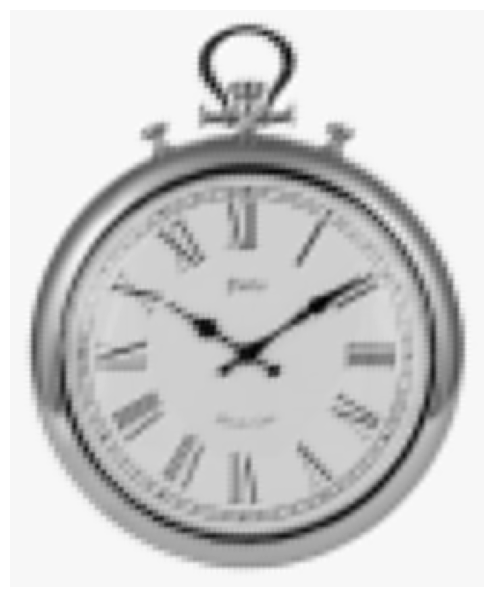

In [56]:
cubic_interpolation('clock.bmp', 3, 3);